In [ ]:
**단계 1:** 전처리에 사용할 패키지 로드

In [2]:
# coding: utf-8
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


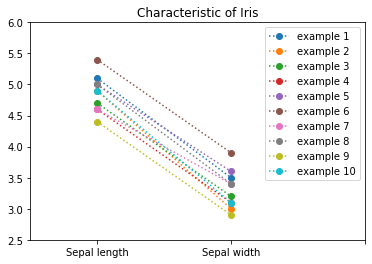

In [3]:
# 데이터 로드 및 그래프 그리기

iris = load_iris()
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃받침 길이와 꽃받침 폭만 선택

plt.plot(X.T, 'o:')
plt.xticks(range(4), ["Sepal length", "Sepal width"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("Characteristic of Iris")
plt.legend(["example {}".format(i + 1) for i in range(N)])
plt.show()

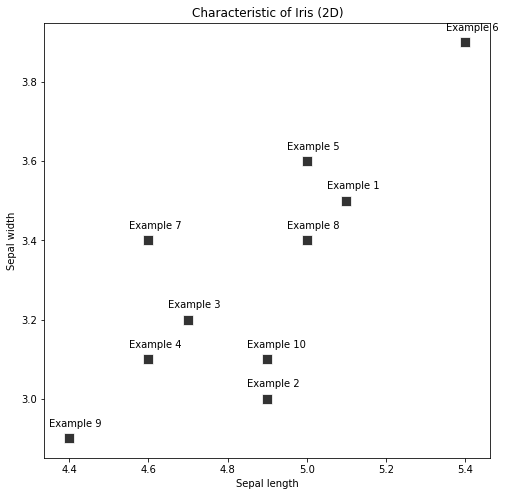

In [4]:
# 산점도로 데이터 특성 분성
# 가로축은 Sepal length, 세로축은 Sepal width를 나타냄
# 데이터를 나라타는 점들이 양의 기울기를 가지기 때문에, 꽃받침의 길이가 크면 폴도 커지는 특성

plt.figure(figsize=(8, 8))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "Example {}".format(i + 1))
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Characteristic of Iris (2D)")
plt.axis("equal")
plt.show()

**단계 2:** PCA를 사용한 차원축소

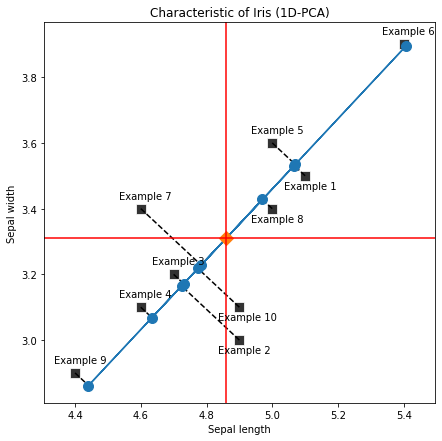

In [13]:
# PCA를 사용한 학습 진행 명시: PCA (n_components)
# n_components: PCA를 통해 나눌 주 성분의 갯수
# PCA.fit_transform(X)
# 특징 행렬 X를 낮은 차원의 근사행렬로 변환합니다.
# 변환된 근사행렬을 다시 역변환하여 PCA의 결과를 확인합니다.
# 역벽환은 PCA.inverse_transform (X)를 사용하여 진행하며, X 이전 변환의 결과인 x_low 특징 행렬을 의미합니다.

 
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "Example {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Characteristic of Iris (1D-PCA)")
plt.axis("equal")
plt.show()